<a href="https://colab.research.google.com/github/shreya-22-ss/Garbage-classification-AICTE/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#loading the zip file into google colab
from google.colab import files
uploaded = files.upload()


MessageError: TypeError: undefined is not an object (evaluating 'steps.next')

In [ ]:
#extracting the zip file into a directory
import zipfile
import os

zip_path = "Garbage_classification.zip"
extract_dir = "garbage_images"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Sample files:", os.listdir(extract_dir)[:5])


Sample files: ['__MACOSX', 'Garbage_classification']


In [ ]:
#setting the image size,batch size and seed
dataset_dir= r"/content/Garbage_classification"
image_size = (124, 124)
batch_size = 32
seed = 42

In [ ]:
#taking dataset for training
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [ ]:
#taking dataset for validation
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [ ]:
# Get the total number of batches in the validation dataset
val_batches = tf.data.experimental.cardinality(val_ds)

# Split the validation dataset into two equal parts:
# First half becomes the test dataset
test_ds = val_ds.take(val_batches // 2)

# Second half remains as the validation dataset
val_dat = val_ds.skip(val_batches // 2)

# Optimize test dataset by caching and prefetching to improve performance
test_ds_eval = test_ds.cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
print(train_ds.class_names)
print(val_ds.class_names)
print(len(train_ds.class_names))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
6


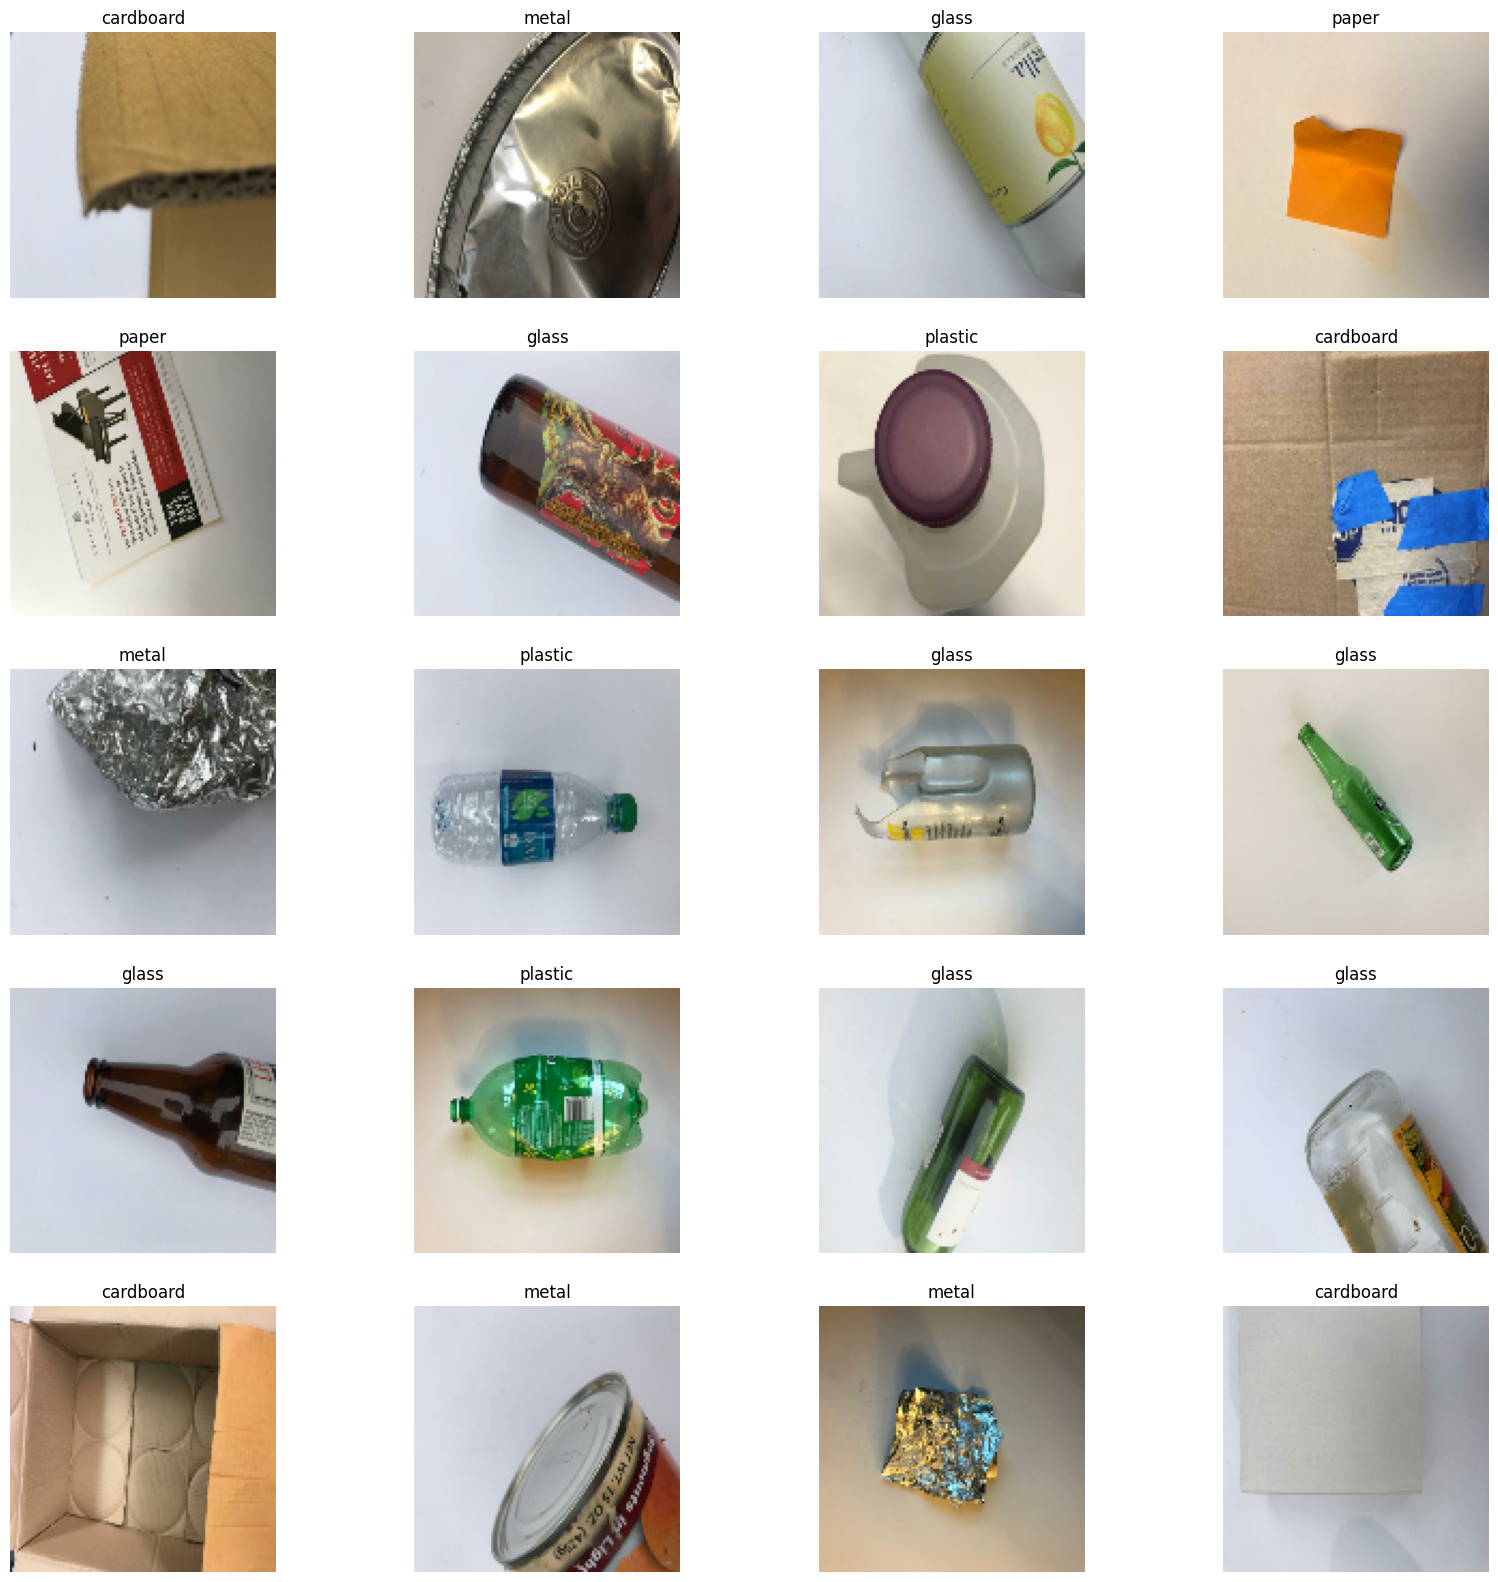

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for images,labels in train_ds.take(5):
  for i in range(20):
    ax = plt.subplot(5,4,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
#counting the number of images in each label
def count_distribution(dataset,class_names):
    total=0
    counts={name:0 for name in class_names}

    for _,labels in dataset:
        for label in labels.numpy():
            class_name=class_names[label]
            counts[class_name]+=1
            total+=1

    for k in counts:
        counts[k]=round((counts[k]/total)*100,2)
    return counts

In [ ]:
#plotting the results in a bar graph
def simple_bar_plot(dist,title):
    plt.bar(dist.keys(),dist.values(),color='purple')
    plt.title(title)
    plt.ylabel('Percentage(%)')
    plt.xticks(rotation=45)
    plt.ylim(0,50)
    plt.tight_layout()
    plt.show()


In [ ]:
#calculating the distribution of each label
class_names=train_ds.class_names
train_dist=count_distribution(train_ds,class_names)
val_dist=count_distribution(val_ds,class_names)
test_dist=count_distribution(test_ds,class_names)
overall_dist ={}
for k in class_names:
    overall_dist[k]=round((train_dist[k]+val_dist[k])/2,2)

print(train_dist)
print(val_dist)
print(test_dist)
print(overall_dist)

{'cardboard': 16.52, 'glass': 19.73, 'metal': 15.92, 'paper': 23.29, 'plastic': 19.44, 'trash': 5.09}
{'cardboard': 13.66, 'glass': 20.2, 'metal': 17.43, 'paper': 24.36, 'plastic': 17.62, 'trash': 6.73}
{'cardboard': 14.45, 'glass': 18.36, 'metal': 18.75, 'paper': 22.27, 'plastic': 17.97, 'trash': 8.2}
{'cardboard': 15.09, 'glass': 19.96, 'metal': 16.68, 'paper': 23.82, 'plastic': 18.53, 'trash': 5.91}


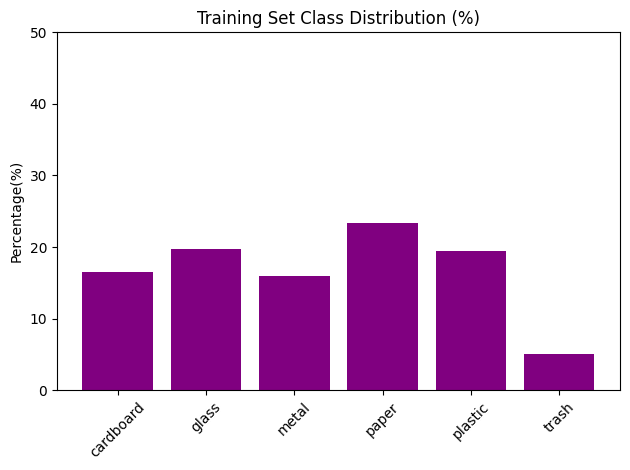

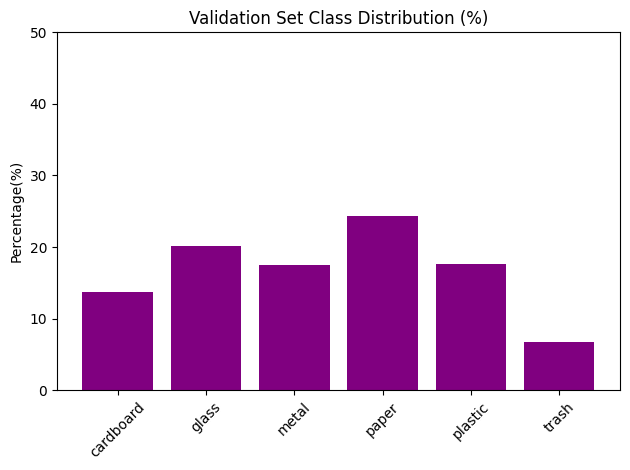

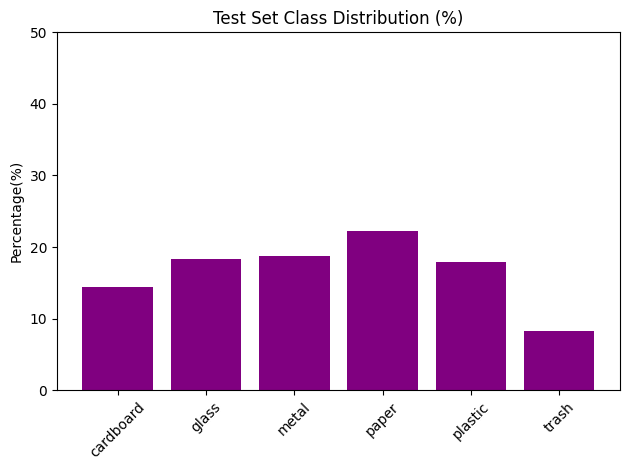

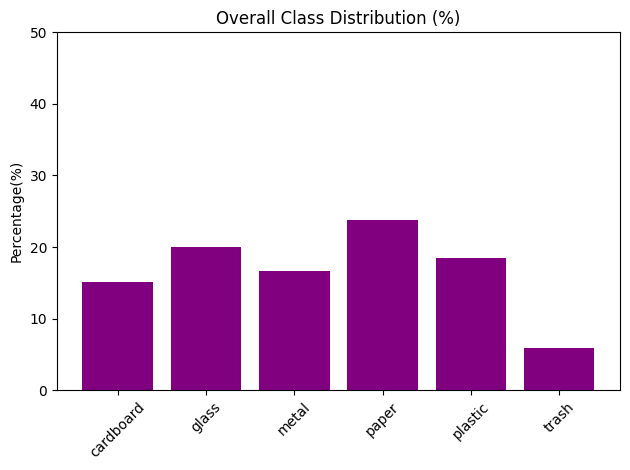

In [ ]:
#Show visualizations by calling the bar graph function
simple_bar_plot(train_dist,"Training Set Class Distribution (%)")
simple_bar_plot(val_dist,"Validation Set Class Distribution (%)")
simple_bar_plot(test_dist,"Test Set Class Distribution (%)")
simple_bar_plot(overall_dist,"Overall Class Distribution (%)")